null device 
          1 


input: 

output: a.jpg

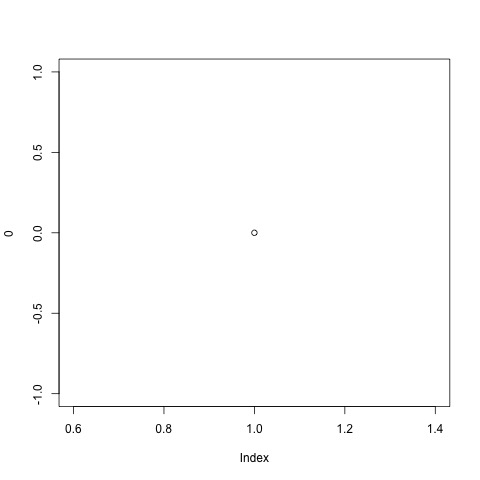

In [1]:
output: 'a.jpg'
R:
    jpeg(${_output!r})
    plot(0)
    dev.off()

[1] -1.6488842  0.8768794 -1.5319963  0.2195867  0.0686131  1.8012204
 [7] -3.7423282 -0.1942267 -0.2599582 -0.5200998

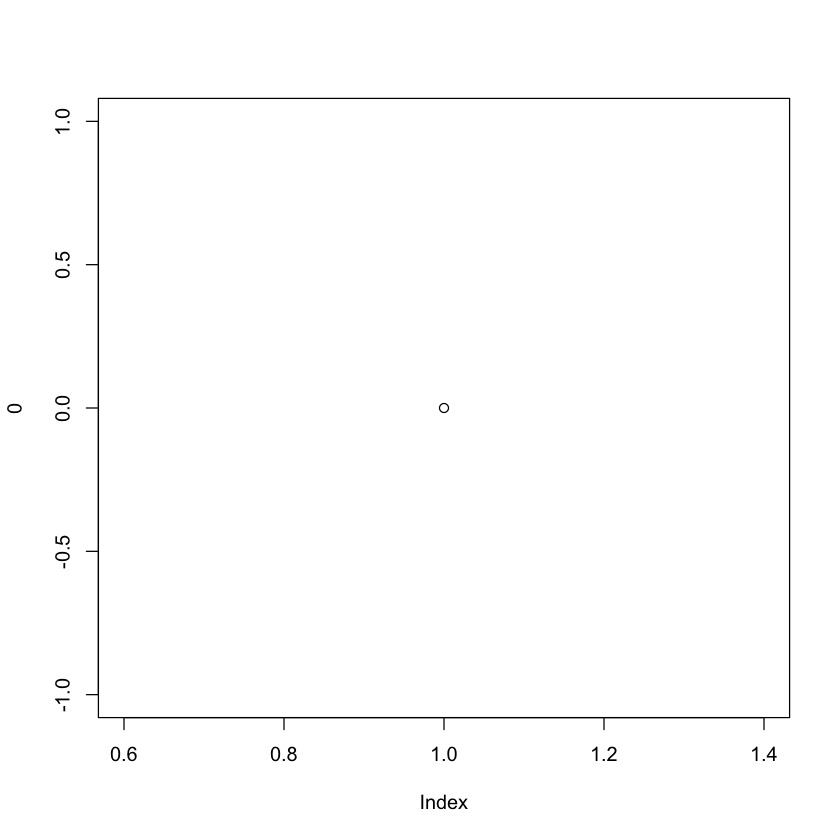

In [1]:
#with R
rnorm(10)
plot(0)

In [3]:
#set -v4
run:
    echo "A"

A
